<a href="https://colab.research.google.com/github/Biruk-gebru/SVM/blob/main/SVMTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, -1)  # shape: (num_samples, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)


In [ ]:
# Build simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8864 - loss: 0.3917 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9828 - loss: 0.0535 - val_accuracy: 0.9846 - val_loss: 0.0460
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9883 - loss: 0.0392 - val_accuracy: 0.9875 - val_loss: 0.0367
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9878 - val_loss: 0.0347
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0215 - val_accuracy: 0.9881 - val_loss: 0.0385


Test accuracy: 0.9881


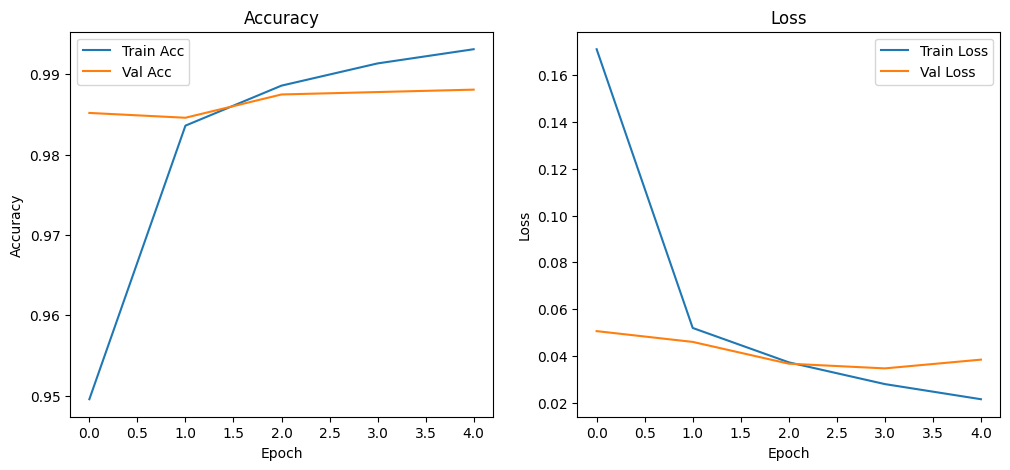

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy/loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


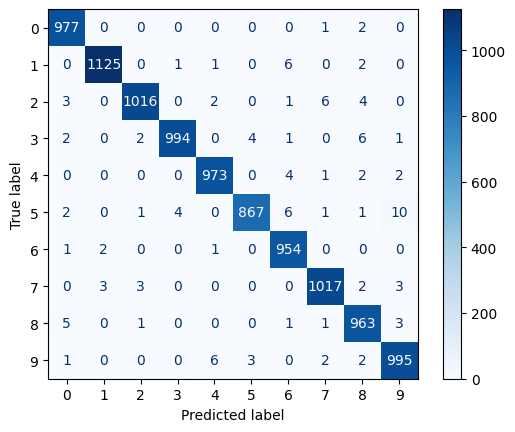

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


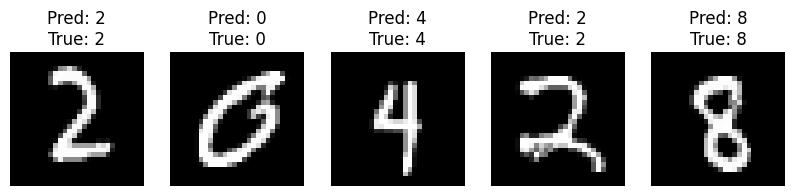

In [ ]:
# Pick random 5 images from test set
indices = np.random.choice(len(X_test), 5, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]

# Predict
predictions = np.argmax(model.predict(sample_images), axis=1)

# Show results
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("model object:", model)
print("type(model):", type(model))
print("model.built:", getattr(model, "built", None))
try:
    print("model.input:", model.input)
except Exception as e:
    print("model.input error:", repr(e))

print("\nLayers:")
for i, layer in enumerate(model.layers):
    print(i, layer.name, type(layer).__name__, "weights:", len(layer.get_weights()))


TF version: 2.19.0
model object: <Sequential name=sequential_1, built=True>
type(model): <class 'keras.src.models.sequential.Sequential'>
model.built: True
model.input error: AttributeError('The layer sequential_1 has never been called and thus has no defined input.')

Layers:
0 conv2d_2 Conv2D weights: 2
1 max_pooling2d_2 MaxPooling2D weights: 0
2 conv2d_3 Conv2D weights: 2
3 max_pooling2d_3 MaxPooling2D weights: 0
4 flatten_1 Flatten weights: 0
5 dense_2 Dense weights: 2
6 dense_3 Dense weights: 2


In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model, layers

feature_extractor = None

# METHOD A: Reuse existing layer instances on a fresh Input (fast & typical)
try:
    inp = Input(shape=(28,28,1))
    x = inp
    for layer in model.layers[:-1]:   # exclude final softmax Dense
        x = layer(x)
    feature_extractor = Model(inputs=inp, outputs=x)
    print("Method A succeeded: feature_extractor created by re-using layers.")
except Exception as e:
    print("Method A failed:", repr(e))
    feature_extractor = None

# METHOD B: Rebuild architecture (without final classifier) and copy weights (fallback)
if feature_extractor is None:
    try:
        inp = Input(shape=(28,28,1))
        x = layers.Conv2D(32, (3,3), activation='relu', name='conv1')(inp)
        x = layers.MaxPooling2D((2,2), name='pool1')(x)
        x = layers.Conv2D(64, (3,3), activation='relu', name='conv2')(x)
        x = layers.MaxPooling2D((2,2), name='pool2')(x)
        x = layers.Flatten(name='flatten')(x)
        x = layers.Dense(64, activation='relu', name='features')(x)

        feature_extractor = Model(inputs=inp, outputs=x)
        print("Rebuilt feature_extractor architecture. Now copying weights...")

        # copy weights layer-by-layer (skip input layer in feature_extractor)
        new_layers = [l for l in feature_extractor.layers if len(l.get_weights())>0]
        old_layers = [l for l in model.layers[:-1] if len(l.get_weights())>0]  # exclude final classifier
        for new_l, old_l in zip(new_layers, old_layers):
            try:
                new_l.set_weights(old_l.get_weights())
            except Exception as we:
                print(f"Warning: could not set weights for {new_l.name}: {we}")

        print("Method B succeeded: weights copied to rebuilt extractor.")
    except Exception as e2:
        print("Method B failed too:", repr(e2))
        feature_extractor = None

# If succeeded, extract features
if feature_extractor is not None:
    print("\nFeature extractor summary:")
    feature_extractor.summary()
    X_train_features = feature_extractor.predict(X_train, batch_size=128, verbose=1)
    X_test_features  = feature_extractor.predict(X_test,  batch_size=128, verbose=1)
    print("Feature shapes:", X_train_features.shape, X_test_features.shape)
else:
    raise RuntimeError("Could not create a feature extractor. Paste the diagnostic output above and I'll inspect it.")


Method A succeeded: feature_extractor created by re-using layers.

Feature extractor summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,280 (473.75 KB)

 Trainable params: 121,280 (473.75 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Feature shapes: (60000, 64) (10000, 64)


In [ ]:
# Reduce dataset to speed up SVM
subset_size = 10000  # try 5000 or 2000 if still slow
X_train_small = X_train_features[:subset_size]
y_train_small = y_train[:subset_size]

svm_clf = SVC(kernel='rbf', C=10, gamma=0.05)
svm_clf.fit(X_train_small, y_train_small)
y_pred_svm = svm_clf.predict(X_test_features)
print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))


SVM accuracy: 0.911


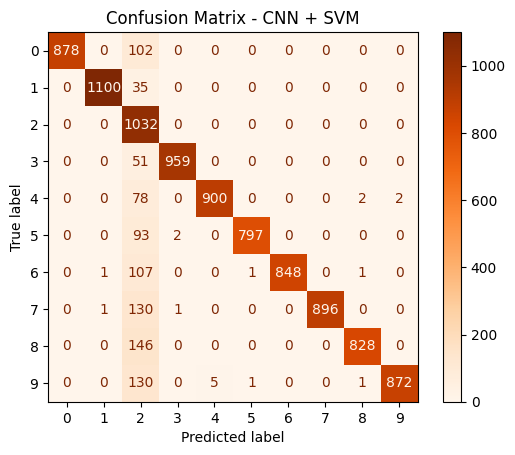

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=range(10))
disp_svm.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - CNN + SVM")
plt.show()


In [ ]:
# Flatten images for SVM
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

print("Train shape:", X_train_flat.shape)
print("Test shape:", X_test_flat.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use a smaller subset to speed up training
subset_size = 5000  # Adjust if still slow
X_train_small = X_train_flat[:subset_size]
y_train_small = y_train[:subset_size]

# RBF kernel SVM
svm_clf_raw = SVC(kernel='rbf', C=10, gamma=0.05)
svm_clf_raw.fit(X_train_small, y_train_small)

# Predict on full test set
y_pred_svm_raw = svm_clf_raw.predict(X_test_flat)

# Evaluate
svm_raw_acc = accuracy_score(y_test, y_pred_svm_raw)
print(f"Pure SVM accuracy (raw pixels): {svm_raw_acc:.4f}")


Pure SVM accuracy (raw pixels): 0.9548


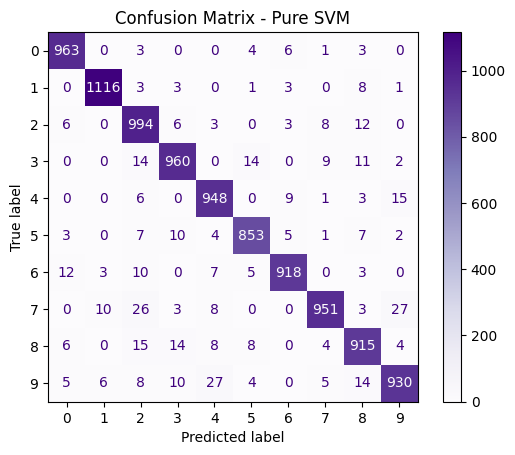

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_raw = confusion_matrix(y_test, y_pred_svm_raw)
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=range(10))
disp_raw.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Pure SVM")
plt.show()
